# ML4N - Adversarial Attacks on Tabular Data Classifiers (group 34)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GROUP_NUMBER = 34

## 1 Data exploration and preprocessing

### 1.2 Data Preprocessing

In [3]:
columns = [
    "status_existing_checking_account",
    "duration_month",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account_bonds",
    "present_employment_since",
    "installment_rate_perc_disposable_income",
    "personal_status_sex",
    "other_debtors_guarantors",
    "present_residence_since",
    "property",
    "age_years",
    "other_installment_plans",
    "housing",
    "number_existing_credits_bank",
    "job",
    "number_people_liable_provide_maintenance",
    "telephone",
    "foreign_worker",
    "label"
]

translation =  {
    "A11": "negative", "A12": "low", "A13": "high", "A14": "not_present", #status checking account
    "A30": "no_cred", "A31": "paid_back", "A32": "on_pair", "A33": "delay", "A34": "critical", #Credit history
    "A40": "car_new", "A41": "car_used", "A42": "furniture", "A43": "radio/tv", "A44": "domestic", "A45": "repairs", "A46": "education", "A47": "vacation", "A48": "retraining", "A49" : "business", "A410": "other", #Purpose
    "A61": "low", "A62": "medium", "A63": "med_high", "A64": "high", "A65": "unknown", #Saving account
    "A71": "unemployed", "A72": "less_1year", "A73": "less_4years", "A74": "less_7years", "A75": "more_7years", #PResent employment since
    "A91": "male_div", "A92": "female", "A93": "male_single", "A94": "male_married", "A95": "female_single", #Personal status and sex
    "A101": "none", "A102": "co-applicant", "A103": "guarantor", #Other debtors or guarantors
    "A121": "real_estate", "A122": "building/society/savings/life_ins", "A123": "car/others", "A124": "unknown/no_prop", #Property
    "A141": "bank", "A142": "store", "A143": "none", #Other installment plans
    "A151": "rent", "A152": "own", "A153": "for_free", #Housing
    "A171": "unemp/unskilled", "A172": "unskilled_resident", "A173": "skilled_empl/off", "A174": "managment/self_emp", #Job
    
    "A191": "none", "A192": "yes", #Telephone
    "A201": "yes", "A202": "no" #Foreign worker
}

df = pd.read_csv(
    'dataset/german.data',
    delimiter=' ',
    header=None,
    names=columns
)
df

,status_existing_checking_account,duration_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_perc_disposable_income,personal_status_sex,other_debtors_guarantors,...,property,age_years,other_installment_plans,housing,number_existing_credits_bank,job,number_people_liable_provide_maintenance,telephone,foreign_worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


1. One-Hot encoding of categorical features
2. MinMax Normalization in [0,1] range
3. train-test dataset split

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
categorical_features = [
    "status_existing_checking_account",
    "credit_history",
    "purpose",
    "savings_account_bonds",
    "present_employment_since",
    "personal_status_sex",
    "other_debtors_guarantors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker"
]
non_categorical_features = list(set(columns).difference(categorical_features + ['label']))

df_processed = df.copy()
enc = OneHotEncoder()
enc.fit(df[categorical_features])
df_processed.drop(categorical_features, axis=1, inplace=True)
df_processed[enc.get_feature_names_out(categorical_features)] = enc.transform(df[categorical_features]).toarray()

mms = MinMaxScaler()
df_processed.loc[:, df_processed.columns != 'label'] = \
    mms.fit_transform(df_processed.loc[:, df_processed.columns != 'label'])

df_processed

,duration_month,credit_amount,installment_rate_perc_disposable_income,present_residence_since,age_years,number_existing_credits_bank,number_people_liable_provide_maintenance,label,status_existing_checking_account_A11,status_existing_checking_account_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,2,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_processed.loc[:, df_processed.columns != 'label'],
    df_processed['label'],
    train_size=0.8,
    random_state=GROUP_NUMBER
)

### 1.3 Exploratory Data Analysis

In [7]:
print(non_categorical_features)

enc.categories_

['age_years', 'credit_amount', 'number_people_liable_provide_maintenance', 'installment_rate_perc_disposable_income', 'number_existing_credits_bank', 'present_residence_since', 'duration_month']


[array(['A11', 'A12', 'A13', 'A14'], dtype=object),
 array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object),
 array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
        'A49'], dtype=object),
 array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object),
 array(['A71', 'A72', 'A73', 'A74', 'A75'], dtype=object),
 array(['A91', 'A92', 'A93', 'A94'], dtype=object),
 array(['A101', 'A102', 'A103'], dtype=object),
 array(['A121', 'A122', 'A123', 'A124'], dtype=object),
 array(['A141', 'A142', 'A143'], dtype=object),
 array(['A151', 'A152', 'A153'], dtype=object),
 array(['A171', 'A172', 'A173', 'A174'], dtype=object),
 array(['A191', 'A192'], dtype=object),
 array(['A201', 'A202'], dtype=object)]

_Non categorical features distribution and mean value analysis_

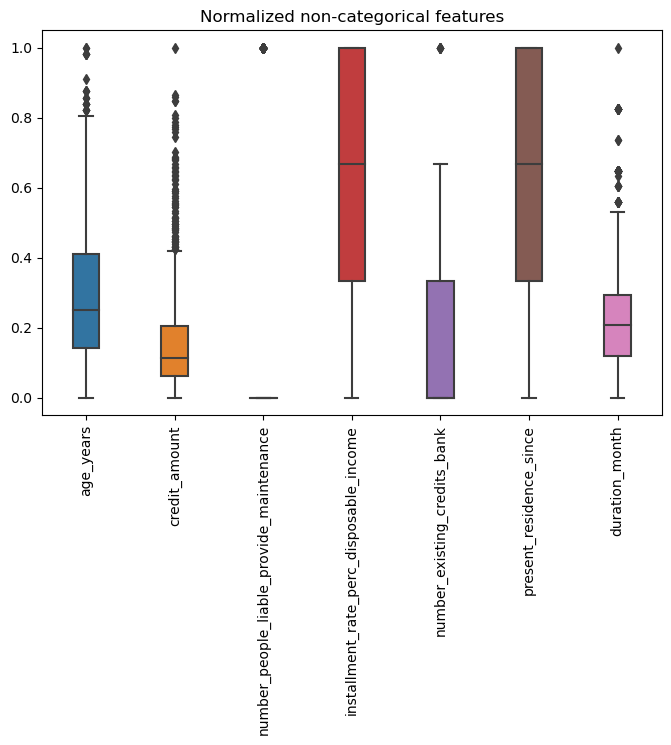

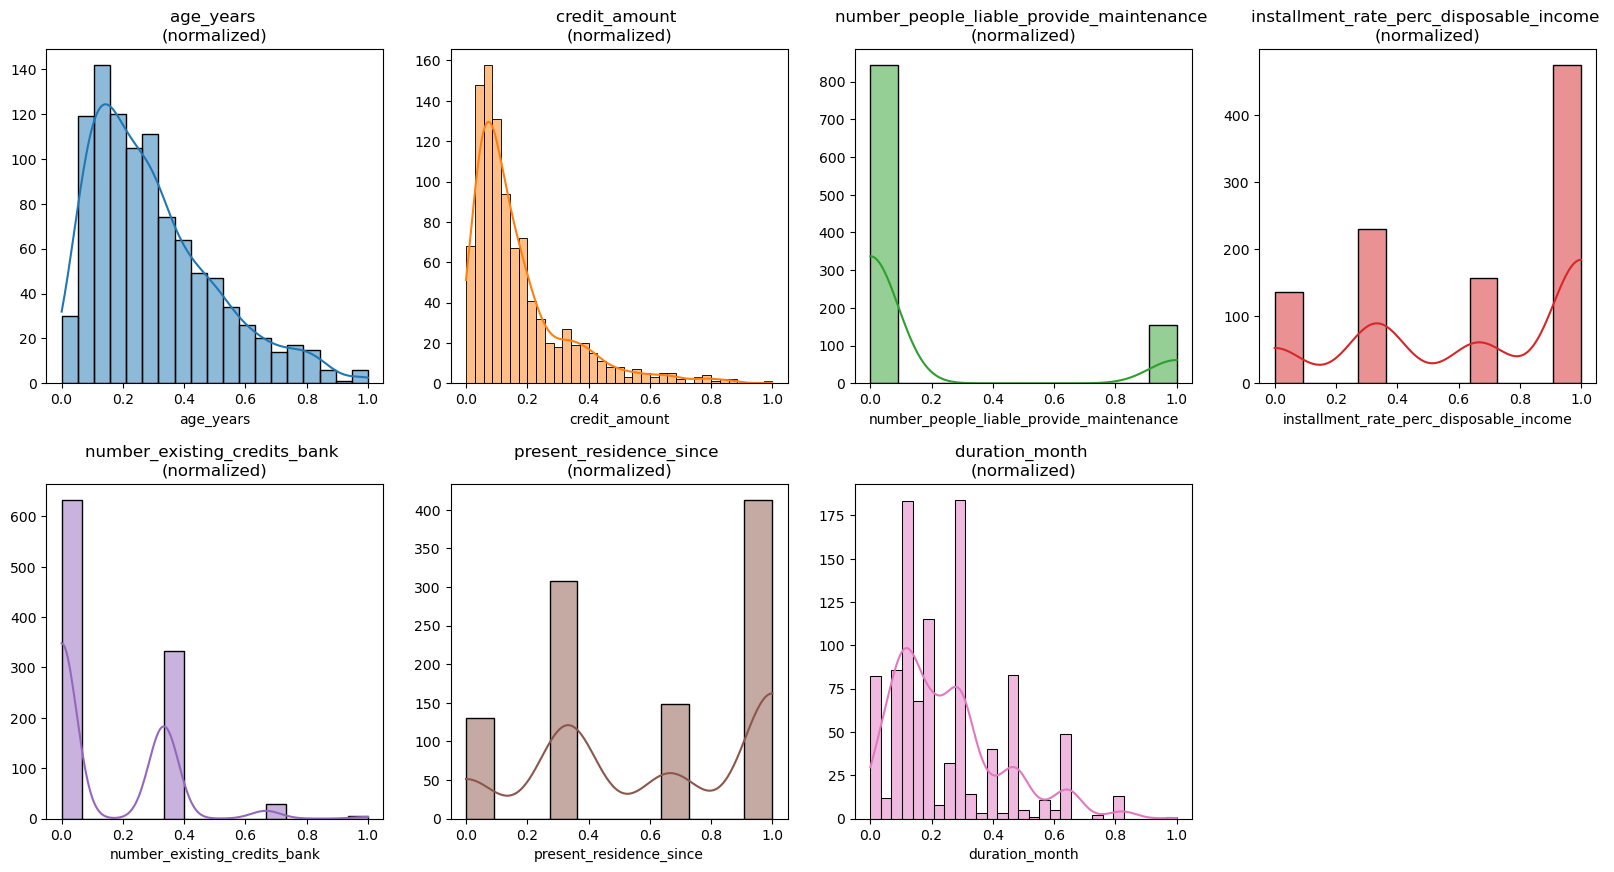

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(df_processed.loc[:,non_categorical_features], width=0.3)
plt.title('Normalized non-categorical features')
plt.xticks(rotation=90)
plt.show()

fig, axs = plt.subplots(2,4, figsize=(20,10))
for i, col in enumerate(non_categorical_features):
    ax = axs[i // 4][i % 4]
    sns.histplot(df_processed.loc[:,col], ax=ax, kde=True, color=sns.color_palette()[i])
    ax.set_title(f"{col} \n(normalized)")
    ax.set_ylabel("")
axs[1][3].remove()
plt.subplots_adjust(hspace=0.3)
plt.show()

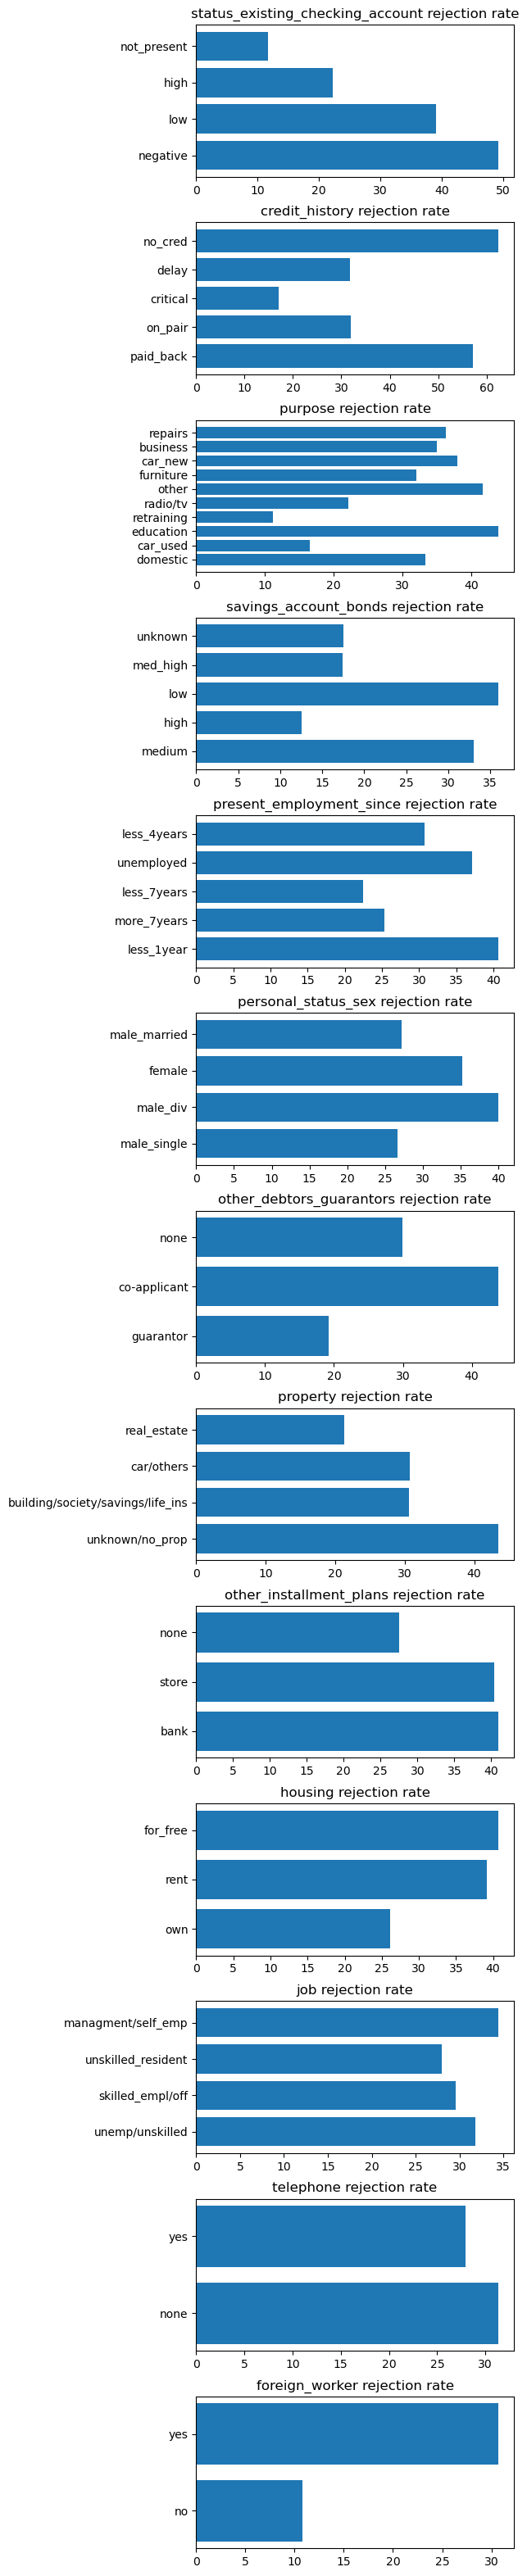

In [ ]:
categorical_features_hotencoded = df_processed.columns.tolist()
categorical_features_hotencoded = list(set(categorical_features_hotencoded).difference(non_categorical_features + ["label"]))

rejection_rates = {}
for col in categorical_features_hotencoded:
    tmp = df_processed[df_processed[col] == 1]
    tot = tmp.size
    neg = tmp[tmp["label"] == 2].size
    rate = neg/tot * 100
    rejection_rates[col] = rate

fig, axs = plt.subplots(len(categorical_features),1, figsize=(5,40))
for i, col in enumerate(categorical_features):
    rr = list(filter(lambda x: x[0].startswith(col), rejection_rates.items()))
    axs[i].barh(y=[translation[x[0].split(col)[1][1:]] for x in rr], width=[x[1] for x in rr])
    axs[i].set_title(f"{col} rejection rate")
plt.subplots_adjust(hspace=0.3)
plt.show()

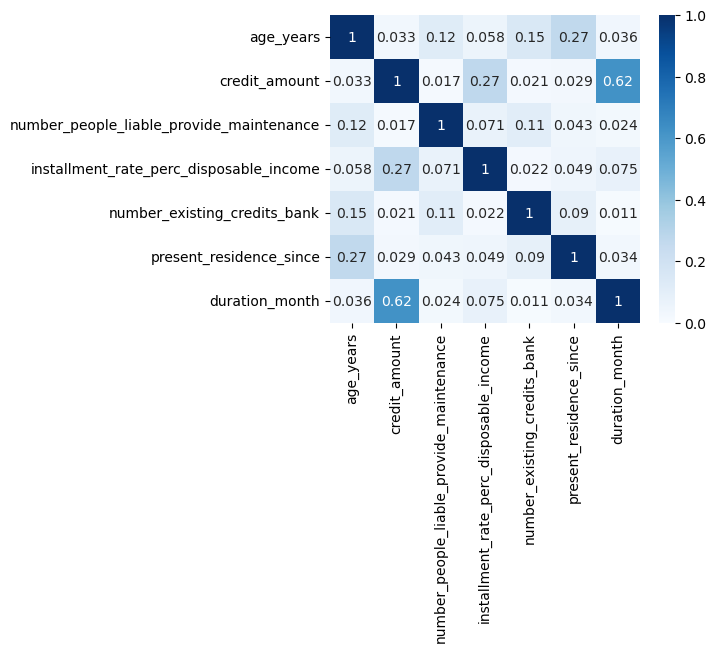

In [22]:
corr_matrix = df[non_categorical_features].corr().abs()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1)
plt.show()

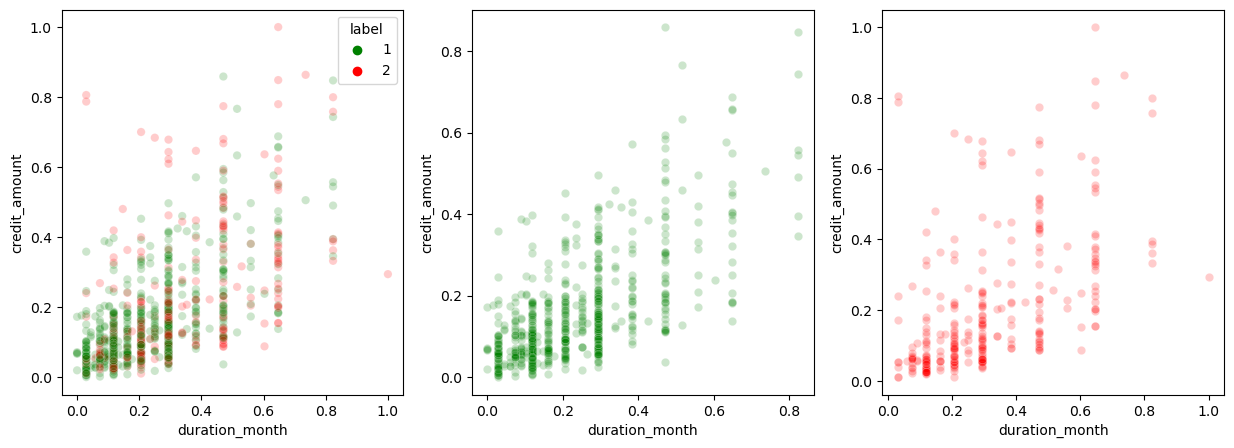

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(df_processed, y='credit_amount',x='duration_month', hue='label', alpha=0.2, palette=['green','red'], ax=axs[0])
sns.scatterplot(df_processed[df_processed['label'] == 1], y='credit_amount',x='duration_month', alpha=0.2, color='green', ax=axs[1])
sns.scatterplot(df_processed[df_processed['label'] == 2], y='credit_amount',x='duration_month', alpha=0.2, color='red', ax=axs[2])
plt.show()

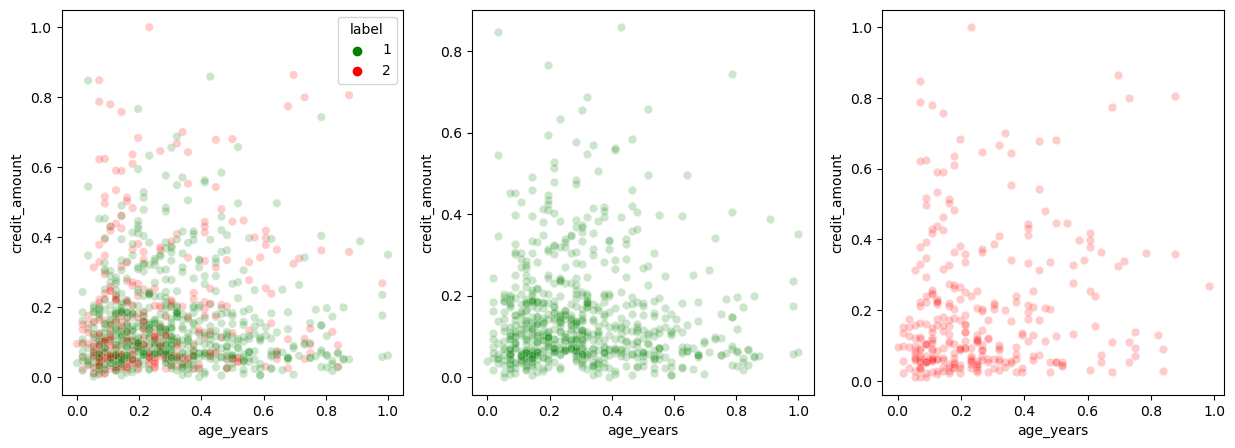

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(df_processed, y='credit_amount',x='age_years', hue='label', alpha=0.2, palette=['green','red'], ax=axs[0])
sns.scatterplot(df_processed[df_processed['label'] == 1], y='credit_amount',x='age_years', alpha=0.2, color='green', ax=axs[1])
sns.scatterplot(df_processed[df_processed['label'] == 2], y='credit_amount',x='age_years', alpha=0.2, color='red', ax=axs[2])
plt.show()

## 2 Unsupervised exploration and clustering

In [25]:
from sklearn.decomposition import PCA

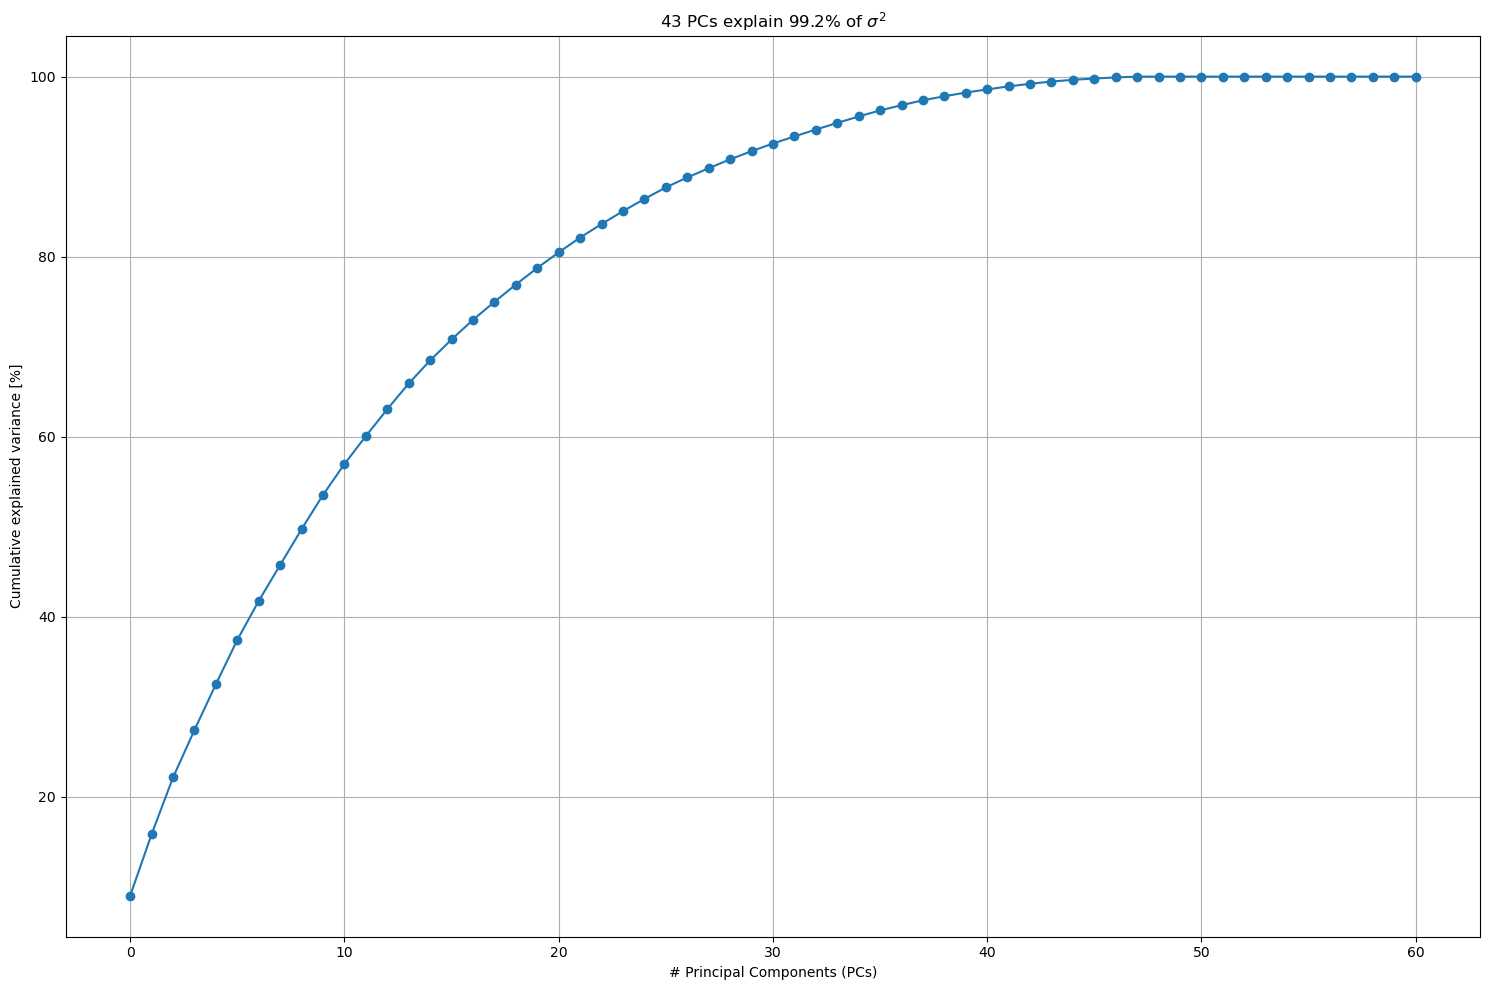

In [37]:
pca = PCA(random_state = GROUP_NUMBER)
features = df_processed.columns.tolist()
features.remove("label")
pca.fit(df_processed[features])

explained_variance = pca.explained_variance_ratio_

perc_cumul_exp_var = np.cumsum(explained_variance) * 100

plt.figure(figsize=(15, 10))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks() #[i for i in range(60)], [i for i in range(1,5)]
plt.grid()
plt.title(f'43 PCs explain {round(perc_cumul_exp_var[42], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

In [38]:
pca = PCA(n_components=43, random_state=GROUP_NUMBER)

pca.fit(df_processed[features])

pca_result = pca.transform(df_processed[features])

df_pca = pd.DataFrame(pca_result)
df_pca['label'] = df_processed['label']
df_pca

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,label
0,1.093896,-0.671381,0.071017,0.303321,0.084118,-0.110836,-0.417682,-0.405371,-0.494935,1.206839,...,0.052407,-0.051767,-0.047520,-0.016265,-0.176023,-0.229730,0.257222,-0.096840,-0.016339,1
1,-1.416504,0.091914,-0.554413,-0.452032,-0.045156,0.024576,-0.116422,-0.824051,0.472686,0.642354,...,-0.052833,-0.002902,0.209375,-0.016502,0.097444,0.409955,0.022784,0.073513,0.032875,2
2,-0.057365,-1.337976,0.891651,-0.151722,0.760248,0.422291,-0.351408,-0.055940,-0.264468,-0.330179,...,0.686248,0.123963,0.066528,0.166973,-0.031675,0.116573,0.029484,-0.296427,-0.161382,1
3,-0.338916,0.466398,1.126655,0.462158,-1.028936,-0.841165,-0.381969,0.710006,-0.219607,0.283009,...,-0.204123,-0.155147,-0.789908,0.084449,-0.544072,0.558166,0.062337,0.042896,-0.074917,1
4,0.126734,0.099974,1.483677,0.675505,-0.634900,-0.680912,-0.411220,-0.133550,1.048460,-0.340213,...,-0.306462,-0.046090,-0.072256,-0.078165,-0.108399,-0.092325,0.176682,-0.040676,0.046013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.110720,-0.061561,-0.003418,-0.086625,0.626471,0.668443,-0.488642,0.089493,-0.819155,-0.394127,...,-0.062367,-0.020371,0.041994,0.019686,0.031693,0.017673,-0.079988,-0.048000,0.033705,1
996,0.324920,1.041201,0.087038,-0.856791,0.197064,-0.279203,-0.891673,0.673756,-0.135778,-0.094908,...,0.296768,-0.260133,0.221969,0.018994,0.021738,-0.048504,-0.062509,-0.014422,0.156565,1
997,-0.014915,-0.808939,-0.476231,0.140822,-0.916645,-0.492958,0.034228,-0.701504,-1.033103,-0.417114,...,0.093690,0.084741,-0.024112,-0.082296,0.018459,-0.073524,-0.070119,-0.026942,-0.003834,1
998,0.572306,0.895386,0.367433,0.039532,-0.977372,-0.702488,-1.093898,-0.798148,0.352825,0.164899,...,-0.165448,-0.000030,-0.012743,-0.094626,0.020943,0.189848,-0.246600,0.089896,0.025258,2


In [ ]:
# Compute the loading scores and create the dataframe
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, 44)],
    index = columns
)

plt.figure()
loadings = loadings[['PC1', 'PC2']]
loadings.sort_values(['PC1', 'PC2']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'3 PCs explain {round(perc_cumul_exp_var[2], 2)}% of $\sigma^2$')
plt.show()

## 3 Supervised Data analysis

## 4 Adversarial Attacks